# **Doctor's Consultation Fees Prediction**

  We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the use case that let's you do that.

## **1.Data understanding**

In [4]:
import numpy as np
import pandas as pd 
import matplotlib as mlp
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_excel("/content/Final_Train.xlsx")

In [8]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [9]:
df.shape

(5961, 7)

In [10]:
print(df.isnull().sum())

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64


In [11]:
df['Fees'].describe()

count    5961.000000
mean      307.944640
std       190.920373
min         5.000000
25%       150.000000
50%       300.000000
75%       500.000000
max       950.000000
Name: Fees, dtype: float64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [13]:
df.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


In [14]:
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [15]:
df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

## **2.Data Cleaning**

In [16]:
print(df.isnull().sum())

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64


droping the Miscellaneous_Info column

In [17]:
df.drop(['Miscellaneous_Info'],axis=1,inplace=True)   
df

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,250
...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,100


Replacing missing values with mode value.

In [18]:
#Filling Null Values
df['Rating'].fillna(value=df['Rating'].mode()[0],inplace=True)
df['Place'].fillna(value=df['Place'].mode()[0],inplace=True)
df

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,100%,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12 years experience,100%,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,250
...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,300
5957,MBBS,33 years experience,100%,"Nungambakkam, Chennai",General Medicine,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,100


Converting Experience into Numeric

In [19]:
for i in range(len(df)):
  df['Experience'][i]=df['Experience'][i][:-17]
df['Experience']=df['Experience'].astype(int)

Converting Rating into Numeric

In [20]:
for i in range(len(df)):
  df['Rating'][i]=df['Rating'][i][:-1]
df['Rating']=df['Rating'].astype(int)

Converting Rating into the range of 0-10 instead of 0-100.

In [21]:
df['Rating']=df['Rating']*0.1

In [22]:
df

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24,10.0,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12,9.8,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9,10.0,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12,10.0,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20,10.0,"Keelkattalai, Chennai",Ayurveda,250
...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,9.8,"Basavanagudi, Bangalore",ENT Specialist,300
5957,MBBS,33,10.0,"Nungambakkam, Chennai",General Medicine,100
5958,MBBS,41,9.7,"Greater Kailash Part 2, Delhi",General Medicine,600
5959,"MBBS, MD - General Medicine",15,9.0,"Vileparle West, Mumbai",General Medicine,100


In [23]:
df['Place'].value_counts()

HSR Layout, Bangalore               100
Andheri West, Mumbai                 70
Dwarka, Delhi                        67
Banjara Hills, Hyderabad             64
Mulund West, Mumbai                  54
                                   ... 
Paruthippara, Thiruvananthapuram      1
Delhi Cantt, Delhi                    1
Manacaud, Thiruvananthapuram          1
Ramachandrapuram, Hyderabad           1
Pappanaickenpudur, Coimbatore         1
Name: Place, Length: 877, dtype: int64

In [24]:
df['Place'].value_counts()

HSR Layout, Bangalore               100
Andheri West, Mumbai                 70
Dwarka, Delhi                        67
Banjara Hills, Hyderabad             64
Mulund West, Mumbai                  54
                                   ... 
Paruthippara, Thiruvananthapuram      1
Delhi Cantt, Delhi                    1
Manacaud, Thiruvananthapuram          1
Ramachandrapuram, Hyderabad           1
Pappanaickenpudur, Coimbatore         1
Name: Place, Length: 877, dtype: int64

since we need only city not area.Removing area from Place. 

In [25]:
for i in range(len(df)):
  df['Place'][i]=df['Place'][i].split(",")[-1]
df

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24,10.0,Ernakulam,Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12,9.8,Bangalore,Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9,10.0,Bangalore,ENT Specialist,300
3,"BSc - Zoology, BAMS",12,10.0,Bangalore,Ayurveda,250
4,BAMS,20,10.0,Chennai,Ayurveda,250
...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,9.8,Bangalore,ENT Specialist,300
5957,MBBS,33,10.0,Chennai,General Medicine,100
5958,MBBS,41,9.7,Delhi,General Medicine,600
5959,"MBBS, MD - General Medicine",15,9.0,Mumbai,General Medicine,100


## **3. EDA**

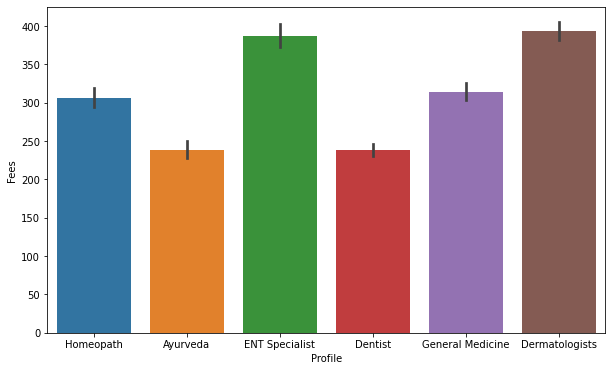

In [26]:
plt.figure(figsize=[10,6])
sns.barplot(x='Profile',y='Fees',data=df)

**Inference:** From the above graph we can see that the 

ENT specialist and Dermatologist charge higher than others.

Dentist and Ayurveda charge lesser.

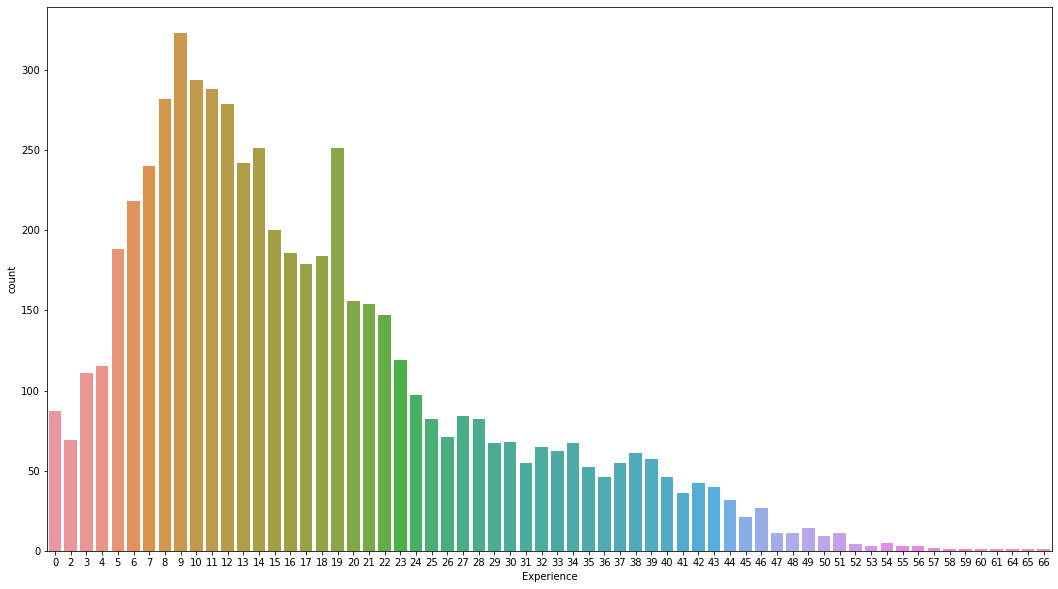

In [30]:
plt.figure(figsize=(18,10))
sns.countplot(x='Experience',data=df)

**Inference:** Maximum Doctors have experience 5-25 years of experience

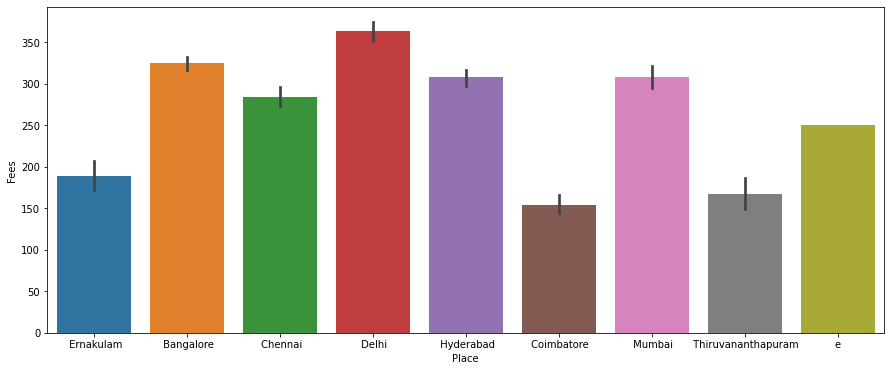

In [137]:
plt.figure(figsize=[15,6])
sns.barplot(x='Place',y='Fees',data=df)

**Inference:** From the above graph

Doctors from Delhi and banglore charge higher

Doctors from coimbatore ,Thiruvanadhapuram and ernakulam charge less

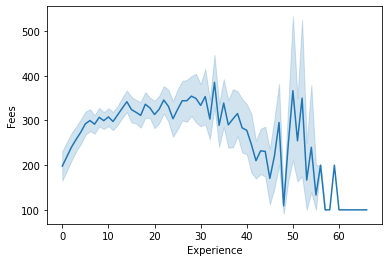

In [138]:
sns.lineplot(x='Experience',y='Fees',data=df)

**Inference:**

Doctors with the Experience 10 to 50 charge higher and gradually decrease with experiance 50-60.

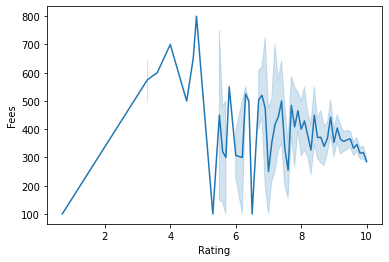

In [139]:
sns.lineplot(x='Rating',y='Fees',data=df)

**Inference:** There is no linear co-relation between rating and Fees.

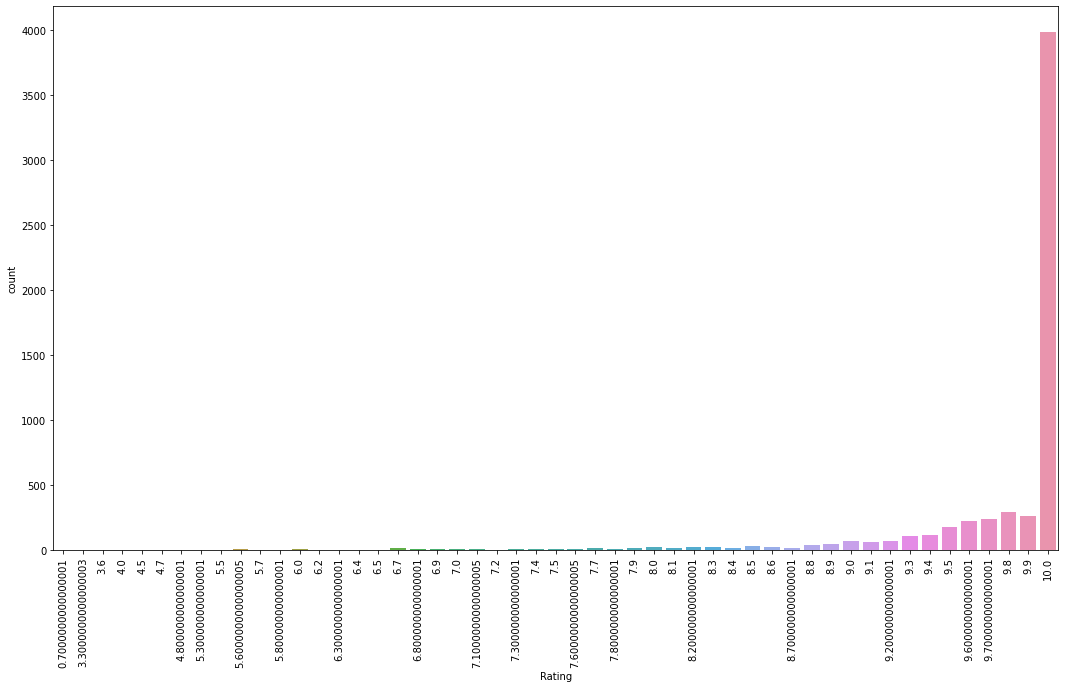

In [33]:
plt.figure(figsize=(18,10))
plt.xticks(rotation=90)
sns.countplot(x='Rating',data=df)

**Inference:** Most of the Ratings given to the doctor is 100%.

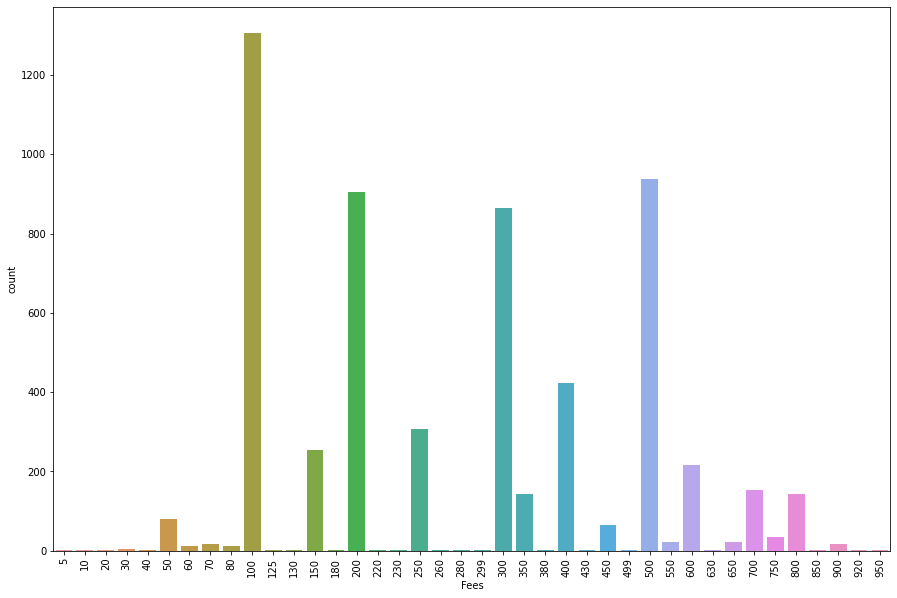

In [34]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.countplot(x='for i in df[cont_cols]:                                 #univariate analysis
    plt.figure(figsize = (15, 8))
    sns.distplot(df[i], bins = 10)
    plt.title(i)
    plt.show()',data=df)

Inference: Most Doctors' Consulation Fees is 100 rupees.

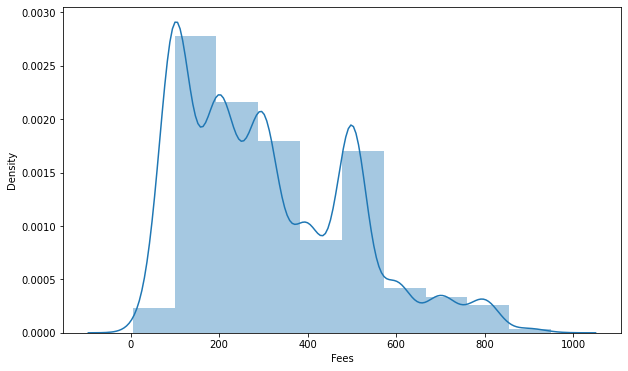

In [41]:
plt.figure(figsize = (10, 6))
sns.distplot(df['Fees'], bins = 10)

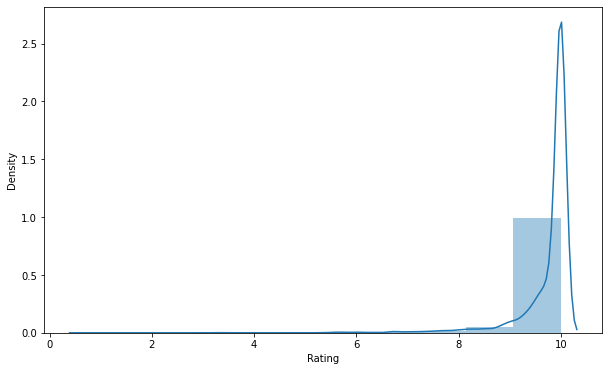

In [43]:
plt.figure(figsize = (10, 6))
sns.distplot(df['Rating'], bins = 10)

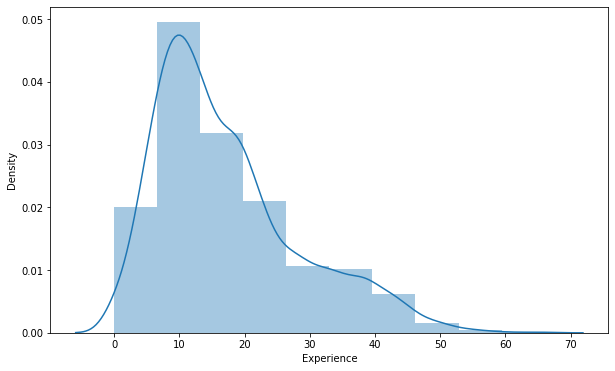

In [44]:
plt.figure(figsize = (10, 6))
sns.distplot(df['Experience'], bins = 10)

In [142]:
df.corr()

,Experience,Rating,Fees
Experience,1.000000,-0.149594,0.002117
Rating,-0.149594,1.000000,-0.154713
Fees,0.002117,-0.154713,1.000000


In [143]:
df_corr=df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
df_corr

,Qualification,Experience,Rating,Place,Profile,Fees
Qualification,1.000000,-0.039932,0.061467,0.002698,0.102841,0.009067
Experience,-0.039932,1.000000,0.004673,-0.007552,0.026782,-0.012972
Rating,0.061467,0.004673,1.000000,-0.072532,0.152744,0.063062
Place,0.002698,-0.007552,-0.072532,1.000000,-0.030113,0.006898
Profile,0.102841,0.026782,0.152744,-0.030113,1.000000,0.008492
Fees,0.009067,-0.012972,0.063062,0.006898,0.008492,1.000000


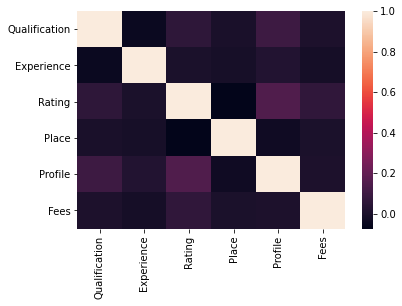

In [144]:
sns.heatmap(df_corr)

## **4.Data PreProcessing**

In [45]:
print(df.isnull().sum())

Qualification    0
Experience       0
Rating           0
Place            0
Profile          0
Fees             0
dtype: int64


In [46]:
df['Qualification'].value_counts()

BDS                                                                     488
BHMS                                                                    477
BAMS                                                                    471
MBBS                                                                    334
MBBS, MS - ENT                                                          220
                                                                       ... 
MBBS, MD - General Medicine, PGDHHM                                       1
BDS, Certificate in Dental Implantology, Certificate in Orthodontics      1
MBBS, MD - General Medicine, Diploma in Health Administration, LLB        1
MBBS, Diploma in Diabetes                                                 1
BDS, MDS, Fellowship In Cosmetic Dermatology                              1
Name: Qualification, Length: 1420, dtype: int64

Cleaning "Qualification" column and encoding

In [47]:
df["Qualification"]=df["Qualification"].str.split(",")
Qualification ={}
for x in df["Qualification"].values:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each]+=1
        else:
            Qualification[each]=1

In [48]:
most_qua = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
final_qua =[]
for tup in most_qua:
    final_qua.append(tup[0])

In [49]:
for title in final_qua:
    df[title]=0
    
for x,y in zip(df["Qualification"].values,np.array([idx for idx in range(len(df))])):
    for q in x:
        q = q.strip()
        if q in final_qua:
            df[q][y] = 1
            
df.drop("Qualification",axis=1,inplace=True)

In [50]:
df.head()

,Experience,Rating,Place,Profile,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,10.0,Ernakulam,Homeopath,100,0,0,0,1,0,0,0,0,0,1
1,12,9.8,Bangalore,Ayurveda,350,0,0,1,0,0,0,0,0,0,0
2,9,10.0,Bangalore,ENT Specialist,300,1,0,0,0,0,0,0,0,0,0
3,12,10.0,Bangalore,Ayurveda,250,0,0,1,0,0,0,0,0,0,0
4,20,10.0,Chennai,Ayurveda,250,0,0,1,0,0,0,0,0,0,0


## **5.Test Train split**

In [51]:
x= df.drop(columns='Fees')
y= df['Fees']
x.head()

,Experience,Rating,Place,Profile,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,10.0,Ernakulam,Homeopath,0,0,0,1,0,0,0,0,0,1
1,12,9.8,Bangalore,Ayurveda,0,0,1,0,0,0,0,0,0,0
2,9,10.0,Bangalore,ENT Specialist,1,0,0,0,0,0,0,0,0,0
3,12,10.0,Bangalore,Ayurveda,0,0,1,0,0,0,0,0,0,0
4,20,10.0,Chennai,Ayurveda,0,0,1,0,0,0,0,0,0,0


### **Encoding**

In [52]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
x['Place']=LE.fit_transform(df['Place'])

In [53]:
x['Profile']=LE.fit_transform(df['Profile'])

In [54]:
x.head()

,Experience,Rating,Place,Profile,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,10.0,4,5,0,0,0,1,0,0,0,0,0,1
1,12,9.8,0,0,0,0,1,0,0,0,0,0,0,0
2,9,10.0,0,3,1,0,0,0,0,0,0,0,0,0
3,12,10.0,0,0,0,0,1,0,0,0,0,0,0,0
4,20,10.0,1,0,0,0,1,0,0,0,0,0,0,0


In [55]:
x['Place'].value_counts()

0    1283
6    1219
3    1185
5     951
1     855
2     228
4     153
7      86
8       1
Name: Place, dtype: int64

In [56]:
x['Profile'].value_counts()

1    1397
4    1173
2    1034
5     843
0     786
3     728
Name: Profile, dtype: int64

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=47)

### **Scaling**

In [58]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
x_train_norm = norm.transform(x_train)

# transform testing dataabs
x_test_norm = norm.transform(x_test)

In [59]:
x_test=pd.DataFrame(x_test_norm)
x_train=pd.DataFrame(x_train_norm)

In [60]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.257576,0.955224,0.000,0.8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.530303,1.000000,0.750,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.439394,1.000000,0.375,0.6,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.666667,1.000000,0.375,0.6,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.151515,0.910448,0.750,0.4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### **Finding bestRandom_state**

In [61]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
best_r_state=0
accu=0

for i in range(30,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    pred_y=mod.predict(x_test)
    tempaccu=r2_score(y_test,pred_y)
    if tempaccu>accu:
        accu=tempaccu
        best_r_state=i

print(f"Best random_state {best_r_state}")

Best random_state 89


In [62]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=89)

In [63]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import metrics

## **6.Model Construction**

### **LinearRegression**

In [64]:
LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.10551328267993754


In [65]:
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,LR_predict)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,LR_predict))
print('r2_score:',r2_score(y_test,LR_predict))

Root Mean Squared Error:  174.22410247707865
Explained Variance Score:  0.1418222594054005
r2_score: 0.14174314620412065


### **RandomForestRegressor**

In [66]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predictions1=rf.predict(x_test)
print(rf.score(x_train,y_train))

0.6767266935726568


In [67]:
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,predictions1)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,predictions1))
print('r2_score:',r2_score(y_test,predictions1))

Root Mean Squared Error:  188.06493669127303
Explained Variance Score:  0.00010617765106679666
r2_score: -3.7930478582470784e-05


### **SVR**

In [68]:
from sklearn.svm import SVR

svr=SVR()
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
svr_predict=svr.predict(x_test)

0.002256847658002714


In [69]:
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,svr_predict)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,svr_predict))
print('r2_score:',r2_score(y_test,svr_predict))

Root Mean Squared Error:  189.1556606242295
Explained Variance Score:  0.016822248530214856
r2_score: -0.011671448033091059


### **DecisionTreeRegressor**

In [71]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

0.7513293481569323


In [72]:
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,DTR_PRED)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,DTR_PRED))
print('r2_score:',r2_score(y_test,DTR_PRED))

Root Mean Squared Error:  226.94352973355177
Explained Variance Score:  -0.4555675186645074
r2_score: -0.4562516118686808


### **GradientBoostingRegressor**

In [73]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

0.23269308109644693


In [74]:
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,GBR_PRED)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,GBR_PRED))
print('r2_score:',r2_score(y_test,GBR_PRED))

Root Mean Squared Error:  167.9804234697481
Explained Variance Score:  0.20219716511857633
r2_score: 0.20215569029779346


### **Ridge**

In [75]:
from sklearn.linear_model import Ridge

R=Ridge()
R.fit(x_train,y_train)
print(R.score(x_train,y_train))
R_predict=R.predict(x_test)

0.10551134862312572


In [76]:
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,R_predict)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,R_predict))
print('r2_score:',r2_score(y_test,R_predict))

Root Mean Squared Error:  174.22415363546054
Explained Variance Score:  0.1418214664235532
r2_score: 0.14174264217468124


### ** Best model is Decision tree with 75% accuracy and Random forest with 67% accuracy.**

## **7. HYPER PARAMETER TUNING**

**Performing Hyper parameter tuning for 2 best models.**

### **Random Forest Regressor**

In [201]:
from sklearn.model_selection import GridSearchCV
rfr=RandomForestRegressor()
parameters={'n_estimators':[100,200,300,400,500],'max_features':['auto', 'sqrt', 'log2']}
reg=GridSearchCV(rfr,parameters)
reg.fit(x,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [202]:
print(reg.best_params_)

{'max_features': 'auto', 'n_estimators': 500}


In [231]:
rfr=RandomForestRegressor(n_estimators=500,max_features='auto') #parameters given from GridSearchCV method.
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)
rfr_y=rfr.predict(x_test)
print("Score of Model is",rfr.score(x_train,y_train))
print("Mean Absolute Error", mean_absolute_error(y_test,rfr_y))
print("Root Mean Squared Error", (mean_squared_error(y_test,rfr_y))**0.5 )

Score of Model is 0.6880253327563266
Mean Absolute Error 144.29880983610775
Root Mean Squared Error 189.78214182457396


score of RandomForestRegressor increased from 67% to 68% after hyper parameter tuning.

### **DecisionTreeRegressor**

In [100]:
from sklearn.model_selection import GridSearchCV
parameter = {'max_features':['auto', 'sqrt', 'log2'],
             'criterion':['mse','friedman_mse','mae', 'poisson'],
             'splitter':['best', 'random']}
GCV = GridSearchCV(DecisionTreeRegressor(),parameter,cv=5)

In [101]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_features': ['auto', 'sqrt', 'log2'],
       

In [102]:
GCV.best_params_

{'criterion': 'mae', 'max_features': 'sqrt', 'splitter': 'random'}

In [103]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor(criterion='friedman_mse',splitter= 'random',max_features='sqrt')
DTR.fit(x_train,y_train)
DTR_final=DTR.predict(x_test)

In [104]:
print("Score of Model is",DTR.score(x_train,y_train))
print("Mean Absolute Error", mean_absolute_error(y_test,DTR_final))
print("Root Mean Squared Error", (mean_squared_error(y_test,DTR_final))**0.5 )

Score of Model is 0.7520307700779512
Mean Absolute Error 163.13207234042895
Root Mean Squared Error 223.26806781197408


After hyperparameter tuning of Decision Tree Regressor score increased from 75.1% to 75.9%

After Hyper parameter tuning 

RandomForestRegressor gives 68.8% score and 

DecisionTreeRegressor gives 75.9% score.

**so Decision Tree Regressor is the best model for this problem.**


## **8.Test dataset**

In [77]:
df_test=pd.read_excel("/content/Final_Test.xlsx")

### **Processing Test Dataset**

In [78]:
#Checking Null Values
df_test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [79]:
df_test.shape

(1987, 6)

In [80]:
df_test.drop(['Miscellaneous_Info'],axis=1,inplace=True)   
df_test

,Qualification,Experience,Rating,Place,Profile
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist
...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist


In [81]:
df_test['Rating'].fillna(value=df_test['Rating'].mode()[0],inplace=True)
df_test['Place'].fillna(value=df_test['Place'].mode()[0],inplace=True)
df_test

,Qualification,Experience,Rating,Place,Profile
0,MBBS,35 years experience,100%,"Ghatkopar East, Mumbai",General Medicine
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,100%,"West Marredpally, Hyderabad",ENT Specialist
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists
3,BAMS,0 years experience,100%,"New Ashok Nagar, Delhi",Ayurveda
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist
...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,100%,"Basavanagudi, Bangalore",Ayurveda
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,100%,"Choolai, Chennai",Dermatologists
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,100%,"Porur, Chennai",General Medicine
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist


In [82]:
df_test.isnull().sum()

Qualification    0
Experience       0
Rating           0
Place            0
Profile          0
dtype: int64

In [83]:
for i in range(len(df_test)):
    df_test['Experience'][i]=df_test['Experience'][i][:-17]
    
df_test['Experience']=df_test['Experience'].astype(int)

In [84]:
for i in range(len(df_test)):
    df_test['Rating'][i]=df_test['Rating'][i][:-1]
    
df_test['Rating']=df_test['Rating'].astype(int)

In [85]:
df_test['Rating']=df_test['Rating']*0.1
df_test

,Qualification,Experience,Rating,Place,Profile
0,MBBS,35,10.0,"Ghatkopar East, Mumbai",General Medicine
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,10.0,"West Marredpally, Hyderabad",ENT Specialist
2,"MBBS, DDVL",40,7.0,"KK Nagar, Chennai",Dermatologists
3,BAMS,0,10.0,"New Ashok Nagar, Delhi",Ayurveda
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,10.0,"Kanakpura Road, Bangalore",Dentist
...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10,10.0,"Basavanagudi, Bangalore",Ayurveda
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4,10.0,"Choolai, Chennai",Dermatologists
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9,10.0,"Porur, Chennai",General Medicine
1985,BDS,12,9.8,"Arekere, Bangalore",Dentist


In [86]:
df_test['Experience']=np.int64(df_test['Experience'])
df_test.dtypes

Qualification     object
Experience         int64
Rating           float64
Place             object
Profile           object
dtype: object

In [87]:
for i in range(len(df_test)):
    df_test['Place'][i]=df_test['Place'][i].split(",")[-1]
    
df_test

,Qualification,Experience,Rating,Place,Profile
0,MBBS,35,10.0,Mumbai,General Medicine
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,10.0,Hyderabad,ENT Specialist
2,"MBBS, DDVL",40,7.0,Chennai,Dermatologists
3,BAMS,0,10.0,Delhi,Ayurveda
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,10.0,Bangalore,Dentist
...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10,10.0,Bangalore,Ayurveda
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4,10.0,Chennai,Dermatologists
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9,10.0,Chennai,General Medicine
1985,BDS,12,9.8,Bangalore,Dentist


In [88]:
#Encoding Place and Profile Column into Numeric Values
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['Place','Profile']
for val in list1:
    df_test[val]=le.fit_transform(df_test[val].astype(str))

In [89]:
df_test

,Qualification,Experience,Rating,Place,Profile
0,MBBS,35,10.0,6,4
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,10.0,5,3
2,"MBBS, DDVL",40,7.0,1,2
3,BAMS,0,10.0,3,0
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,10.0,0,1
...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10,10.0,0,0
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4,10.0,1,2
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9,10.0,1,4
1985,BDS,12,9.8,0,1


In [90]:
df_test['Qualification']=df_test['Qualification'].str.split(",")
df_test['Qualification'].values

array([list(['MBBS']),
       list(['MBBS', ' Diploma in Otorhinolaryngology (DLO)']),
       list(['MBBS', ' DDVL']), ...,
       list(['MBBS', ' MD / MS - Obstetrics & Gynaecology']),
       list(['BDS']),
       list(['MBBS', ' MD - Dermatology ', ' Venereology & Leprosy'])],
      dtype=object)

In [91]:
Qual_test={}

for y in df_test['Qualification'].values:
    for each_t in y:
        each_t=each_t.strip()
        if each_t in Qual_test:
            Qual_test[each_t]+=1
        else:
            Qual_test[each_t]=1
            
print(Qual_test)

{'MBBS': 980, 'Diploma in Otorhinolaryngology (DLO)': 85, 'DDVL': 67, 'BAMS': 243, 'BDS': 428, 'MDS - Conservative Dentistry & Endodontics': 34, 'MDS': 21, 'MDS - Pedodontics': 10, 'MD - Ayurveda Medicine': 41, 'Yoga Teachers Training Course': 2, 'M. D. IN KAYACHIKISTA': 2, 'BHMS': 249, 'FCD - Diabetology': 2, 'DDV': 38, 'MD - Dermatology': 196, 'MS - ENT': 128, 'DNB - ENT': 39, 'MNAMS (Membership of the National Academy)': 3, 'Diploma in Naturopathy & Yogic Science (DNYS)': 1, 'Diploma in Diet and Nutrition': 4, 'Diploma in Cosmetology': 5, 'PG Diploma In Clinical Cosmetology (PGDCC)': 4, 'MDS - Periodontics': 13, 'MDS- Oral Pathology': 1, 'MD - General Medicine': 99, 'DNB - Otorhinolaryngology': 15, 'PhD - Endodontics': 1, 'BSc': 3, 'LCEH': 6, 'DGO': 4, 'MD - Obstetrics & Gynaecology': 5, 'MD - Homeopathy': 62, 'DM - Oncology': 1, 'DNB - Dermatology': 5, 'Venereology & Leprosy': 91, 'DVD': 11, 'MS - Otorhinolaryngology': 42, 'Fellowship in Aesthetic Medicine': 5, 'Fellowship in Oral 

In [92]:
most_qual_test=sorted(Qual_test.items(),key=lambda x:x[1],reverse=True)[:10]
most_qual_test

[('MBBS', 980),
 ('BDS', 428),
 ('BHMS', 249),
 ('BAMS', 243),
 ('MD - Dermatology', 196),
 ('MS - ENT', 128),
 ('MD - General Medicine', 99),
 ('Venereology & Leprosy', 91),
 ('Diploma in Otorhinolaryngology (DLO)', 85),
 ('DDVL', 67)]

In [93]:
final_qual_test=[]
for qt in most_qual_test:
    final_qual_test.append(qt[0])

print(final_qual_test)

['MBBS', 'BDS', 'BHMS', 'BAMS', 'MD - Dermatology', 'MS - ENT', 'MD - General Medicine', 'Venereology & Leprosy', 'Diploma in Otorhinolaryngology (DLO)', 'DDVL']


In [94]:
for qft in final_qual_test:
    df_test[qft]=0
    
for x,y in zip(df_test['Qualification'].values,np.array([i for i in range(len(df_test))])):
    for c in x:
        c=c.strip()
        if c in final_qual_test:
            df_test[c][y]=1

In [95]:
df_test

,Qualification,Experience,Rating,Place,Profile,MBBS,BDS,BHMS,BAMS,MD - Dermatology,MS - ENT,MD - General Medicine,Venereology & Leprosy,Diploma in Otorhinolaryngology (DLO),DDVL
0,[MBBS],35,10.0,6,4,1,0,0,0,0,0,0,0,0,0
1,"[MBBS, Diploma in Otorhinolaryngology (DLO)]",31,10.0,5,3,1,0,0,0,0,0,0,0,1,0
2,"[MBBS, DDVL]",40,7.0,1,2,1,0,0,0,0,0,0,0,0,1
3,[BAMS],0,10.0,3,0,0,0,0,1,0,0,0,0,0,0
4,"[BDS, MDS - Conservative Dentistry & Endodont...",16,10.0,0,1,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,"[BAMS, Doctor of Medicine]",10,10.0,0,0,0,0,0,1,0,0,0,0,0,0
1983,"[MD - Dermatology , Venereology & Leprosy, M...",4,10.0,1,2,1,0,0,0,1,0,0,1,0,0
1984,"[MBBS, MD / MS - Obstetrics & Gynaecology]",9,10.0,1,4,1,0,0,0,0,0,0,0,0,0
1985,[BDS],12,9.8,0,1,0,1,0,0,0,0,0,0,0,0


In [96]:
df_test.drop(['Qualification'],axis=1,inplace=True)
df_test

,Experience,Rating,Place,Profile,MBBS,BDS,BHMS,BAMS,MD - Dermatology,MS - ENT,MD - General Medicine,Venereology & Leprosy,Diploma in Otorhinolaryngology (DLO),DDVL
0,35,10.0,6,4,1,0,0,0,0,0,0,0,0,0
1,31,10.0,5,3,1,0,0,0,0,0,0,0,1,0
2,40,7.0,1,2,1,0,0,0,0,0,0,0,0,1
3,0,10.0,3,0,0,0,0,1,0,0,0,0,0,0
4,16,10.0,0,1,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,10,10.0,0,0,0,0,0,1,0,0,0,0,0,0
1983,4,10.0,1,2,1,0,0,0,1,0,0,1,0,0
1984,9,10.0,1,4,1,0,0,0,0,0,0,0,0,0
1985,12,9.8,0,1,0,1,0,0,0,0,0,0,0,0


In [105]:
DTR_pred=DTR.predict(df_test)
DTR_pred

array([200.        , 350.        , 100.        , ..., 166.66666667,
       300.        , 400.        ])

In [106]:
DTR_pred=pd.DataFrame(DTR_pred, columns=['Fees'])
DTR_pred

,Fees
0,200.000000
1,350.000000
2,100.000000
3,150.000000
4,300.000000
...,...
1982,300.000000
1983,300.000000
1984,166.666667
1985,300.000000


In [111]:
DTR_pred.to_csv('DTR_pred.csv')

In [113]:
import pickle

filename='Doctor_Consulation_Fee.pkl'
pickle.dump(DTR,open(filename,'wb'))

loaded_model=pickle.load(open(filename,'rb'))

loaded_model.predict(df_test)

array([200.        , 350.        , 100.        , ..., 166.66666667,
       300.        , 400.        ])